## Moving to Pytorch

### Import files

In [153]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision

### Try Cuda

In [139]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

### Load the dataset
Creates ImageFolder object, converts to tensor, and returns DataLoader object

In [140]:
def load_dataset():
    data_path = 'Team_Data'
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.Compose([torchvision.transforms.CenterCrop(100),
                                                 torchvision.transforms.ToTensor(),
                                                ])
    )
    return train_dataset

def to_dataloader(train_dataset=None):
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=20,
        num_workers=0,
        shuffle=True
    )
    return train_loader

In [152]:
image_datasets = load_dataset()
print(len(image_datasets))
print(image_datasets.classes)

717
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


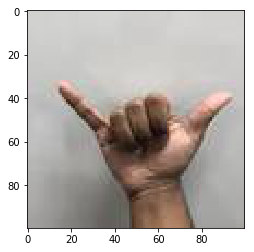

In [157]:
# example image in dataset

for i in image_datasets:
    for img in i:
        if isinstance(img, torch.Tensor):
            plt.imshow(img.permute(1,2,0))
            break

In [175]:
train_size = np.rint(len(image_datasets) * .8).astype(int).item()
val_size = np.rint(len(image_datasets) * .2).astype(int).item()

train_data, val_data = torch.utils.data.random_split(image_datasets, [train_size, val_size])
print(train_data.classes)

AttributeError: 'Subset' object has no attribute 'classes'

In [102]:
data = to_dataloader(image_datasets)

TypeError: 'DataLoader' object is not subscriptable